In [2]:
#Import Dependencies
import pandas as pd
import pymongo

#Connect to Mongo and Define a Database
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client.StatePlants_db
collection = db.items

In [3]:
#Compile Data from State CSVs, Parse The Genus and Species Name
#for Use in Record, Import Records in State-named Collections to MongoDB. 

#50 States
StateList = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
             'Florida','Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
             'Maine','Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi','Missouri', 'Montana',
             'Nebraska', 'Nevada','New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York', 'North_Carolina',
             'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 'Rhode_Island', 'South_Carolina', 
             'South_Dakota', 'Tennessee', 'Texas',  'Utah',  'Vermont',  'Virginia','Washington',  'West_Virginia',
             'Wisconsin',  'Wyoming']

#Read CSVs through a for loop.
for i in range(len(StateList)):
    #print(i)
    path = (f'State_csv/{StateList[i]}.csv')
    PlantList=pd.read_csv(path, encoding='utf-8')
    PlantList['State']=StateList[i]

    #Extract Genus and Species Name by taking First Two Words from 'Scientific Name with Author'
    Scientificname=[]
    for x in PlantList['Scientific Name with Author']:
        name=x.split()[:2]
        Scientificname.append(name)
        
    #Create a Column with Scientific Name
    Scientificnamedf=pd.DataFrame(Scientificname, columns = ['Genus', 'Species'])
    Scientificnamedf['Scientific Name with Author']=PlantList['Scientific Name with Author']
    Scientificnamedf.head()
    
    #Merge Data Frames
    Compositedf=PlantList.merge(Scientificnamedf)

    #Convert Dataframes to Dictionaries and Insert into Mongo Database
    db[StateList[i]].insert_many(Compositedf.to_dict('record'))

In [4]:
#View First Record in the Alabama Collection. 
import pprint
pprint.pprint(db.Alabama.find_one())

{'Family': 'Acanthaceae',
 'Genus': 'Dicliptera',
 'National Common Name': 'branched foldwing',
 'Scientific Name with Author': 'Dicliptera brachiata (Pursh) Spreng.',
 'Species': 'brachiata',
 'State': 'Alabama',
 'Symbol': 'DIBR2',
 'Synonym Symbol': nan,
 '_id': ObjectId('5e8abca514bc4039ab405524')}


In [5]:
#Verify Length of Database (50 States Collections)
len(db.list_collection_names())

50

In [6]:
# Determine how many Carex species are in California
CarexList=[]
for i in db.California.find({"Genus":"Carex"}):
    CarexList.append(i)
len(CarexList)


342

In [7]:
# List the Scientific Name with Author of each Carex species (First Five)
for i in CarexList[:5]:
    print(i['Scientific Name with Author'])

Carex abrupta Mack.
Carex alma L.H. Bailey
Carex amplifolia Boott
Carex amplectens Mack.
Carex angustata Boott


In [8]:
#Create Function through which to Find the Number of Species in Any Genus and Any State
def CountSpeciesinState(State, Genus):
    List = []
    for i in db[State].find({"Genus":Genus}):
        List.append(i)
    return (len(List))
#Create Function through which to Return List of Scientific Name with Author in Any Genus and Any State
def ListSpeciesinState(State, Genus):
    DictionaryList = []
    for i in db[State].find({"Genus":Genus}):
        DictionaryList.append(i)
    SpeciesList = []
    for i in DictionaryList:
        SpeciesList.append(i['Species'])
    return (SpeciesList)

In [9]:
# List the Scientific Name with Author of each Carex species in California (First Five)
ListSpeciesinState("California", "Carex")[:5]

['abrupta', 'alma', 'amplifolia', 'amplectens', 'angustata']

In [10]:
# List the Scientific Name with Author of each Carex species in Wyoming (First Five)
ListSpeciesinState("Wyoming", "Carex")[:5]

['albonigra', 'alopecoidea', 'aquatilis', 'aquatilis', 'acutinella']

In [11]:
# Import matplotlib dependencies
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

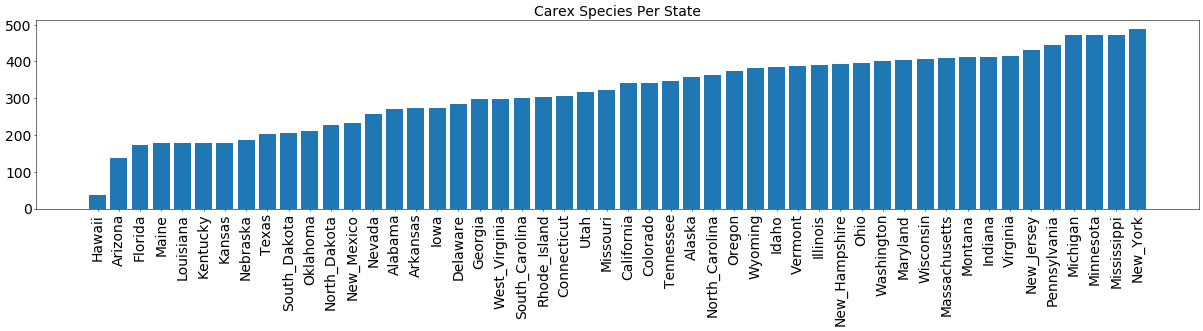

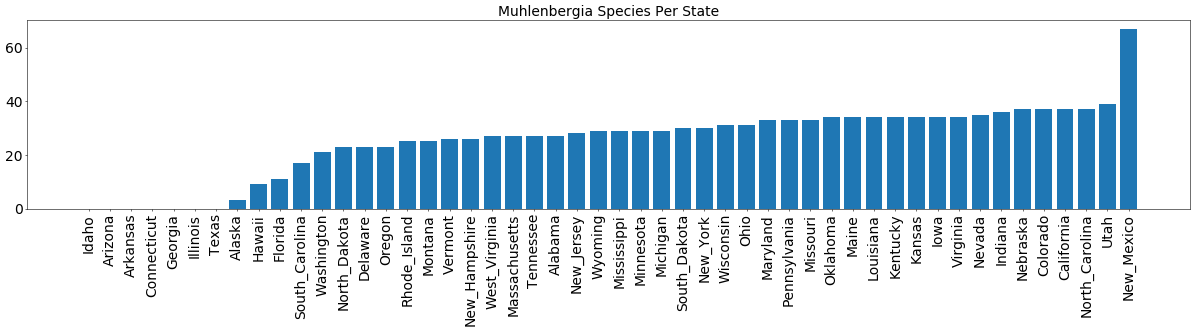

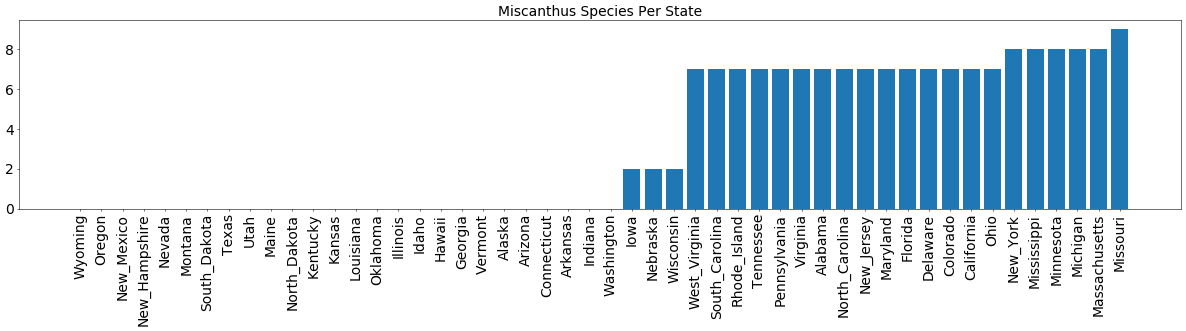

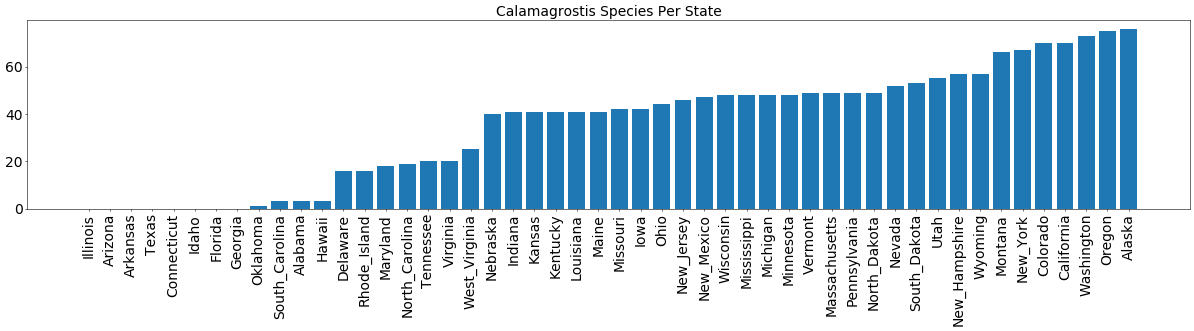

In [17]:
#Find all the number of Query_Species_List Species in all States & Plot Species per State
Query_Species_List = ["Carex", "Muhlenbergia", "Miscanthus", "Calamagrostis"]
for i in Query_Species_List:
    SpeciesPerState=[]
    for state in StateList:
        SpeciesPerState.append(CountSpeciesinState(state, i))
    #Create Dataframe of States and Counts of Carex Species Per State
    SpeciesDf = pd.DataFrame(SpeciesPerState, StateList, columns=[f'Count of {i} Species'])
    #Sort Dataframe by Incrementing Species Count
    SpeciesDf = SpeciesDf.sort_values(by =f'Count of {i} Species', ascending=True)
    SpeciesDf = SpeciesDf.reset_index()
    SpeciesDf = SpeciesDf.rename(columns={'index':'State'})
    SpeciesDf
    #Plot Via matplotlib.pyplot
    plt.figure(num=None, figsize=[30,5], dpi=50)
    plt.bar(SpeciesDf['State'] , SpeciesDf[f'Count of {i} Species'])
    plt.xticks(rotation=90)
    plt.tick_params(axis='both', labelsize=20)
    plt.title(f'{i} Species Per State', fontsize=20)
    plt.savefig(f"Visualizations/{i}SpeciesPerState.jpg")
    plt.show()

In [13]:
# List Carex Species in California (First 5)
ListSpeciesinState("California", "Carex")[:5]

['abrupta', 'alma', 'amplifolia', 'amplectens', 'angustata']

In [14]:
# List Muhlenbergia Species in California (First 5)
ListSpeciesinState("California", "Muhlenbergia")[:5]

['andina', 'comata', 'appressa', 'arsenei', 'asperifolia']

In [15]:
# List Miscanthus Species in California (First 5)
ListSpeciesinState("California", "Miscanthus")[:5]

['Andersson', 'sinensis', 'sinensis', 'sinensis', 'sinensis']

In [16]:
# List Calamagrotis Species in California (First 5)
ListSpeciesinState("California", "Calamagrostis")[:5]

['bolanderi', 'breweri', 'lemmonii', 'canadensis', 'canadensis']